### **Drowsiness detection (Model creation & Training Part)**

Extract the dataset file

In [1]:
from zipfile import ZipFile

a = ZipFile('/content/drive/MyDrive/archive (1).zip')
a.extractall()

Import Libraries

In [2]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import cv2

Create a Data generator function which includes data agumentation and preprocessing

In [3]:

def Datagenerator(dir, gen=image.ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, rotation_range=30), shuffle=True,batch_size=1,target_size=(40,40),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

path_train = '/content/train/'
train_batch= Datagenerator(path_train,shuffle=True, batch_size=32,target_size=(40,40))


Found 4000 images belonging to 2 classes.


Modelling a sequential model

In [4]:

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(40,40,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),    
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 34, 34, 64)        0

Training a model

In [6]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# callback fuction for saving model checkpoint 
# model_checkpoint = ModelCheckpoint("eyes_model",
#                                    monitor='val_my_iou_metric',
#                                    mode = 'max',
#                                    save_best_only=True,
#                                    verbose=1)


# Learning Rate annealer
reduce_lr = ReduceLROnPlateau(factor=0.1,
                              patience=4,
                              min_lr=0.00001,
                              verbose=1,
                              monitor = 'loss')
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# fitting training data
model.fit_generator(train_batch,epochs=12,steps_per_epoch=len(train_batch.classes)//32, callbacks=[reduce_lr] )
# Saving model
model.save('/content/drive/MyDrive/ddv0.5.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 2/12
125/125 [==============================] - 5s 37ms/step - loss: 0.0253 - accuracy: 0.9931
Epoch 3/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 4/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0130 - accuracy: 0.9951
Epoch 5/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 6/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0181 - accuracy: 0.9954
Epoch 7/12
125/125 [==============================] - 5s 37ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 8/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0188 - accuracy: 0.9962
Epoch 9/12
125/125 [==============================] - 5s 36ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 10/12
125/125 [==============================] - 5s 37ms/step - loss: 0.0079 - accura

Predictions

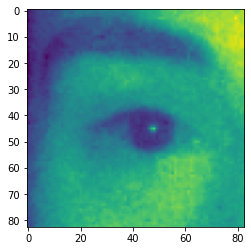

In [7]:
import tensorflow as tf
# loading Model
model = tf.keras.models.load_model(r"/content/drive/MyDrive/ddv0.5.h5")
file = '/content/train/Open_Eyes/s0001_02337_0_0_1_0_0_01.png'
# defining Image size
IMG_SIZE = 40
# Visualizing Image to be predicted
import matplotlib.pyplot as plt
plt.imshow(plt.imread(file))
# processing image to feed the model for predicting the class
img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img_array = img_array / 255
resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
resized_array =  resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [8]:
#This is the predicted Class and it looks that model perfomer pretty well
prediction = model.predict([resized_array])
np.argmax(prediction)

1

0

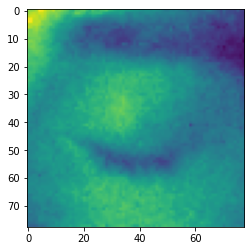

In [9]:
file = '/content/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png'
# defining Image size
IMG_SIZE = 40
# Visualizing Image to be predicted
import matplotlib.pyplot as plt
plt.imshow(plt.imread(file))
# processing image to feed the model for predicting the class
img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img_array = img_array / 255
resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
resized_array =  resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([resized_array])
np.argmax(prediction)